In [68]:
import nltk             # for stopwords, for stemming
# nltk.download()
import pandas as pd
import string           # dict of punctuations
import re               # regular expression lib, for matching patterns
import csv

In [70]:
# with open("SMSSpamCollection.tsv", 'r', newline= '') as file:
#     rawData = csv.reader(file)
#     data = list(rawData)

# read the raw file
rawData = open('SMSSpamCollection.tsv').read()

# print first 500 characters
rawData[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [71]:
parsedData = rawData.replace('\t', '\n').split('\n')
parsedData[0:5]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham']

In [72]:
# save the lables (ham) that appears on every other roll and do same for the text(body)
labels = parsedData[0::2]
text = parsedData[1::2]

print(labels[0:10:2])
print(text[0:5])

['ham', 'ham', 'ham', 'spam', 'ham']
["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.", "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "Nah I don't think he goes to usf, he lives around here though", 'Even my brother is not like to speak with me. They treat me like aids patent.', 'I HAVE A DATE ON SUNDAY WITH WILL!!']


In [74]:
fullCorpus = pd.DataFrame({
    'label': labels[:-1],
    'body_list': text
})
fullCorpus

,label,body_list
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
...,...,...
5565,spam,This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy...
5566,ham,Will ü b going to esplanade fr home?
5567,ham,"Pity, * was in mood for that. So...any other suggestions?"
5568,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week ...


In [75]:
# Importing the data the easy way
dataset = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None)

# Setting labels for the columns
dataset.columns = ['label', 'body_text']

# View the first 5 rows of the data
dataset.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [76]:
# Check the shape of the data
print("Data has {} rows and {} columns".format(
    len(dataset), len(dataset.columns)))

Data has 5568 rows and 2 columns


In [77]:
# Check the ratio of spam to ham
print("Out of {} rows, the number of spam are {} and the number of ham are {}".format(len(
    dataset), len(dataset[dataset['label'] == 'spam']), len(dataset[dataset['label'] == 'ham'])))

Out of 5568 rows, the number of spam are 746 and the number of ham are 4822


In [78]:
# How much missing data do we have
print("There are {} missing labels in our data".format(
    dataset['label'].isnull().sum()))
print("There are {} missing text in our data".format(
    dataset['body_text'].isnull().sum()))

There are 0 missing labels in our data
There are 0 missing text in our data


In [79]:
# Using pandas directly
fullCorpusNew = pd.read_csv('SMSSpamcollection.tsv', sep='\t', header=None)
fullCorpusNew.columns = ['label', 'body_text']
columns = fullCorpusNew.columns
print(fullCorpusNew.columns)

Index(['label', 'body_text'], dtype='object')


In [80]:
fullCorpusNew.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [81]:
# what is the shape of the dataset
print('dataset has {} rows and {} colmus'.format(
    len(fullCorpusNew), len(fullCorpusNew.columns)))
print('of the {} dataset, {} are labeled as spam and {} are labeled as ham'.format(len(fullCorpusNew),
                                                                                   len(
    fullCorpusNew[fullCorpusNew['label'] == 'spam']),
    len(fullCorpusNew[fullCorpusNew['label'] == 'ham']))
)

dataset has 5568 rows and 2 colmus
of the 5568 dataset, 746 are labeled as spam and 4822 are labeled as ham


In [82]:
# check for any missing data

print('there are {} missing data in row'.format(
    fullCorpusNew['label'].isnull().sum()))
print('there are {} missing data in row'.format(
    fullCorpusNew['body_text'].isnull().sum()))

there are 0 missing data in row
there are 0 missing data in row


In [83]:
# fullCorpusNew.iloc[3, fullCorpusNew['body_text']]

# split the text by finding any spcial character and make them delimeter for spliting
re.split('\W+', fullCorpusNew['body_text'][0])

['I',
 've',
 'been',
 'searching',
 'for',
 'the',
 'right',
 'words',
 'to',
 'thank',
 'you',
 'for',
 'this',
 'breather',
 'I',
 'promise',
 'i',
 'wont',
 'take',
 'your',
 'help',
 'for',
 'granted',
 'and',
 'will',
 'fulfil',
 'my',
 'promise',
 'You',
 'have',
 'been',
 'wonderful',
 'and',
 'a',
 'blessing',
 'at',
 'all',
 'times',
 '']

In [84]:
# split the text by finding any spcial character or token
re.findall('\w+', fullCorpusNew['body_text'][0])

['I',
 've',
 'been',
 'searching',
 'for',
 'the',
 'right',
 'words',
 'to',
 'thank',
 'you',
 'for',
 'this',
 'breather',
 'I',
 'promise',
 'i',
 'wont',
 'take',
 'your',
 'help',
 'for',
 'granted',
 'and',
 'will',
 'fulfil',
 'my',
 'promise',
 'You',
 'have',
 'been',
 'wonderful',
 'and',
 'a',
 'blessing',
 'at',
 'all',
 'times']

In [85]:
# set the number of data that should be displayed
pd.set_option('display.max_colwidth', 100)

# read data again, since there are no headers, set with column attribute of the df
data = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None)
data.columns = ['label', 'body_text']

data.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [87]:
# create a list of punctions from the library
punct = string.punctuation

In [88]:
# function to remove punctuations from the dataset, join help keep the individual char together
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in punct])
    return text_nopunct


# create new column without punctuations
data['body_text_clean'] = data['body_text'].apply(lambda x: remove_punct(x))
data.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


### The below functions could be defined in one function but this was splitted through the learning process

In [89]:
# create func to split words into tokens and store in a list, \W+ regx splits on every non-char words like space or special char
def tokenise(text):
    tokens = re.split("\W+", text)
    return tokens


# apply the function to the desired column in dataframe
data['body_text_tokenised'] = data['body_text_clean'].apply(
    lambda x: tokenise(x.lower()))

In [90]:
data.head()

,label,body_text,body_text_clean,body_text_tokenised
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


In [91]:
# remove stopwords. commonly used words that does not contribute much to a sentence
stopwords = nltk.corpus.stopwords.words('english')


def remove_stopwords(tokenised_list):
    text_nostops = [word for word in tokenised_list if word not in stopwords]
    return text_nostops


# cerate a new column from the tokenised words and store in new column
data['body_text_nostops'] = data['body_text_tokenised'].apply(
    lambda x: remove_stopwords(x))
data.head()

,label,body_text,body_text_clean,body_text_tokenised,body_text_nostops
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


## The big idea is to help the model to learn better by everything we done, and now let's stem things
#### Stemming

There are different stemming techniques but the most popuplar one porterstemmer was focused on

In [100]:
# parser the stemmer into a variable making an object
ps = nltk.PorterStemmer()

# the concept of stemming
print(ps.stem("grows"))
print(ps.stem("growth"))
print(ps.stem("growing"))
print(ps.stem("grow"))
print(ps.stem("run"))
print(ps.stem("running"))
print(ps.stem("runner"))
print(ps.stem("runneth"))



grow
growth
grow
grow
run
run
runner
runneth


In [114]:
# create new dataframe from the exist with just labels and the tokenised text without stopwords
data_stem = data[['label', 'body_text_nostops']].copy()
data_stem.head()

,label,body_text_nostops
0,ham,"[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom..."
1,spam,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"[nah, dont, think, goes, usf, lives, around, though]"
3,ham,"[even, brother, like, speak, treat, like, aids, patent]"
4,ham,"[date, sunday]"


In [115]:
# define func to apply stemming to each word in the iterated list
def stemming(tokenised_text):
    text = [ps.stem(word) for word in tokenised_text]
    return text


data_stem['body_text_stemmed'] = data['body_text_nostops'].apply(lambda x: stemming(x))
data_stem.head()

,label,body_text_nostops,body_text_stemmed
0,ham,"[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won..."
1,spam,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
2,ham,"[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"
3,ham,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,"[date, sunday]","[date, sunday]"


In [116]:
# just a random check for missing data again
data_stem.isnull().sum()

label                0
body_text_nostops    0
body_text_stemmed    0
dtype: int64

### Lemmatising
interesting way of reducing words in the corpus, almost similar to stemming, but it uses more informed analysis to create groups of words with similar meaning based on the context.
NB: there are trade-off between accuracy and speed. stem is faster as it chops off the suffix

In [109]:
# load the lemmatiser into an object
wn = nltk.WordNetLemmatizer()

In [112]:
# stemming vs lemmatising
print(ps.stem('meaning'))
print(ps.stem('meanness'))
print(ps.stem('goose'))
print(ps.stem('geese'))
print("\n")
# print(dir(wn))
print(wn.lemmatize("meaning"))
print(wn.lemmatize("meanness"))
print(wn.lemmatize("goose"))
print(wn.lemmatize("geese"))


mean
mean
goos
gees


meaning
meanness
goose
goose


In [121]:
# create function to preform lemmatising over the iterated words inputed
def lemmatising(tokenised_list):
    text  = [wn.lemmatize(word) for word in tokenised_list]
    return text


data['body_text_lemmantised'] = data['body_text_nostops'].apply(lambda x: lemmatising(x))
data.tail(10)

,label,body_text,body_text_clean,body_text_tokenised,body_text_nostops,body_text_lemmantised
5558,ham,Ok lor... Sony ericsson salesman... I ask shuhui then she say quite gd 2 use so i considering...,Ok lor Sony ericsson salesman I ask shuhui then she say quite gd 2 use so i considering,"[ok, lor, sony, ericsson, salesman, i, ask, shuhui, then, she, say, quite, gd, 2, use, so, i, co...","[ok, lor, sony, ericsson, salesman, ask, shuhui, say, quite, gd, 2, use, considering]","[ok, lor, sony, ericsson, salesman, ask, shuhui, say, quite, gd, 2, use, considering]"
5559,ham,Ard 6 like dat lor.,Ard 6 like dat lor,"[ard, 6, like, dat, lor]","[ard, 6, like, dat, lor]","[ard, 6, like, dat, lor]"
5560,ham,Why don't you wait 'til at least wednesday to see if you get your .,Why dont you wait til at least wednesday to see if you get your,"[why, dont, you, wait, til, at, least, wednesday, to, see, if, you, get, your, ]","[dont, wait, til, least, wednesday, see, get, ]","[dont, wait, til, least, wednesday, see, get, ]"
5561,ham,Huh y lei...,Huh y lei,"[huh, y, lei]","[huh, lei]","[huh, lei]"
5562,spam,REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 th...,REMINDER FROM O2 To get 250 pounds free call credit and details of great offers pls reply 2 this...,"[reminder, from, o2, to, get, 250, pounds, free, call, credit, and, details, of, great, offers, ...","[reminder, o2, get, 250, pounds, free, call, credit, details, great, offers, pls, reply, 2, text...","[reminder, o2, get, 250, pound, free, call, credit, detail, great, offer, pls, reply, 2, text, v..."
5563,spam,This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy...,This is the 2nd time we have tried 2 contact u U have won the £750 Pound prize 2 claim is easy c...,"[this, is, the, 2nd, time, we, have, tried, 2, contact, u, u, have, won, the, 750, pound, prize,...","[2nd, time, tried, 2, contact, u, u, 750, pound, prize, 2, claim, easy, call, 087187272008, now1...","[2nd, time, tried, 2, contact, u, u, 750, pound, prize, 2, claim, easy, call, 087187272008, now1..."
5564,ham,Will ü b going to esplanade fr home?,Will ü b going to esplanade fr home,"[will, ü, b, going, to, esplanade, fr, home]","[ü, b, going, esplanade, fr, home]","[ü, b, going, esplanade, fr, home]"
5565,ham,"Pity, * was in mood for that. So...any other suggestions?",Pity was in mood for that Soany other suggestions,"[pity, was, in, mood, for, that, soany, other, suggestions]","[pity, mood, soany, suggestions]","[pity, mood, soany, suggestion]"
5566,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week ...,The guy did some bitching but I acted like id be interested in buying something else next week a...,"[the, guy, did, some, bitching, but, i, acted, like, id, be, interested, in, buying, something, ...","[guy, bitching, acted, like, id, interested, buying, something, else, next, week, gave, us, free]","[guy, bitching, acted, like, id, interested, buying, something, else, next, week, gave, u, free]"
5567,ham,Rofl. Its true to its name,Rofl Its true to its name,"[rofl, its, true, to, its, name]","[rofl, true, name]","[rofl, true, name]"


## Vectorisation

### count vectorization

Taking the tokenised stemmed or lemmatised text row by row or say line by line and counting eah word occurence as they appear all through the document, counting each word per cell.
This words form columns and are called document term matrix.

### 

## Feature Engineering
Create some features to any exisiting one

In [1]:
import pandas as pd
import string

### Load Dataset

In [2]:
# Read the raw data in and create header for the data
data = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None)
data.columns = ['label', 'body_text']


### Create some features

In [3]:
# We want to add a feature based on the legnth of text. Remember the need to remove whitespaces
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))


# Create function to count the number of times a punctuation showed up in text, sum them and round to 3 decimal places
def count_punct(text):
   count_char = sum([1 for char in text if char in string.punctuation])
   return round(count_char/(len(text) - text.count(" ")), 3) * 100


# Create a new column for the feature by apply the above func
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()


,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


### Evaluate created features

In [4]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline


In [7]:
print(dir(np))
data.head()

['ALLOW_THREADS', 'AxisError', 'BUFSIZE', 'CLIP', 'ComplexWarning', 'DataSource', 'ERR_CALL', 'ERR_DEFAULT', 'ERR_IGNORE', 'ERR_LOG', 'ERR_PRINT', 'ERR_RAISE', 'ERR_WARN', 'FLOATING_POINT_SUPPORT', 'FPE_DIVIDEBYZERO', 'FPE_INVALID', 'FPE_OVERFLOW', 'FPE_UNDERFLOW', 'False_', 'Inf', 'Infinity', 'MAXDIMS', 'MAY_SHARE_BOUNDS', 'MAY_SHARE_EXACT', 'ModuleDeprecationWarning', 'NAN', 'NINF', 'NZERO', 'NaN', 'PINF', 'PZERO', 'RAISE', 'RankWarning', 'SHIFT_DIVIDEBYZERO', 'SHIFT_INVALID', 'SHIFT_OVERFLOW', 'SHIFT_UNDERFLOW', 'ScalarType', 'Tester', 'TooHardError', 'True_', 'UFUNC_BUFSIZE_DEFAULT', 'UFUNC_PYVALS_NAME', 'VisibleDeprecationWarning', 'WRAP', '_CopyMode', '_NoValue', '_UFUNC_API', '__NUMPY_SETUP__', '__all__', '__builtins__', '__cached__', '__config__', '__deprecated_attrs__', '__dir__', '__doc__', '__expired_functions__', '__file__', '__getattr__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_add_newdoc_ufunc', '_distributor_in

,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


AttributeError: Rectangle.set() got an unexpected keyword argument 'normed'

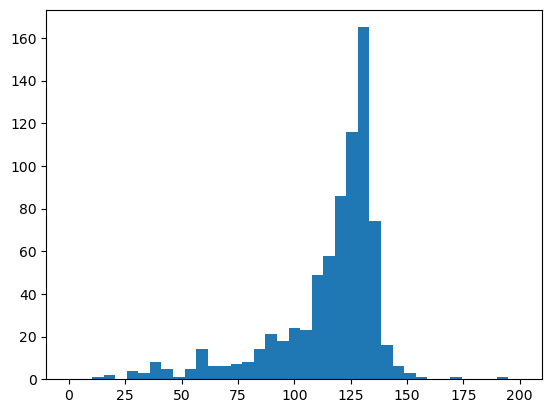

In [6]:
# Create a array of evenly spaced values according to the 'start' 'stop' and 'num parameters set using numpy arrays. The array will have the length of 'num'. Powerful tool for visualisation and computing
bins = np.linspace(0, 200, 40)

# Plot histogram to have an overview of the data, watch out for the long tail of outliers which can introduce bias or imbalance.
pyplot.hist(data[data['label']=='spam']['body_len'], bins, alpha=0.5, normed=True, label='spam')
pyplot.hist(data[data['label']=='ham']['body_len'], bins, alpha=0.5, normed=True, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

AttributeError: Rectangle.set() got an unexpected keyword argument 'normed'

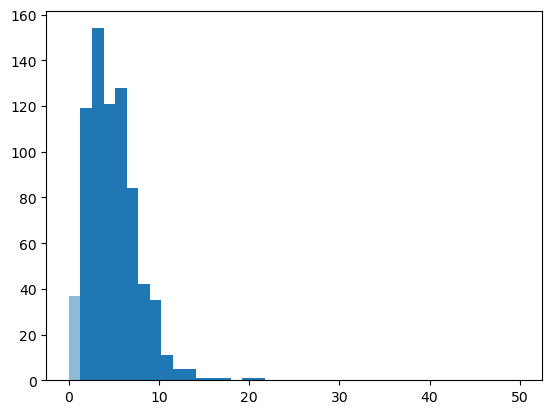

In [8]:
# Repeat. Create a array of evenly spaced values according to the 'start' 'stop' and 'num parameters set using numpy arrays. The array will have the length of 'num'. Powerful tool for visualisation and computing
bins = np.linspace(0, 50, 40)

# Again. Plot histogram, check for long tail, the normed option takes care of the outliers, dragging them towards the central data. alpha sets the darkeness of the bars.
pyplot.hist(data[data['label']=='spam']['punct%'], bins, alpha=0.5, normed=True, label='spam')
pyplot.hist(data[data['label']=='ham']['punct%'], bins, alpha=0.5, normed=True, label='ham')
pyplot.legend('upper right')
pyplot.show()

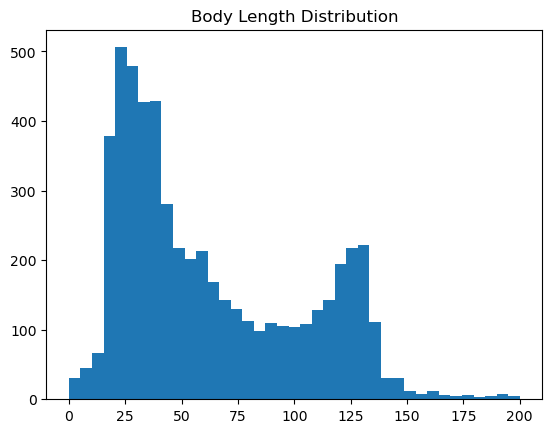

In [10]:
# Repeat. Create a array of evenly spaced values according to the 'start' 'stop' and 'num parameters set using numpy arrays. The array will have the length of 'num'. Powerful tool for visualisation and computing
bins = np.linspace(0, 200, 40)

# Again. Plot histogram, check for long tail, the normed option takes care of the outliers, dragging them towards the central data. alpha sets the darkeness of the bars.
pyplot.hist(data['body_len'], bins)
pyplot.title("Body Length Distribution")
pyplot.show()


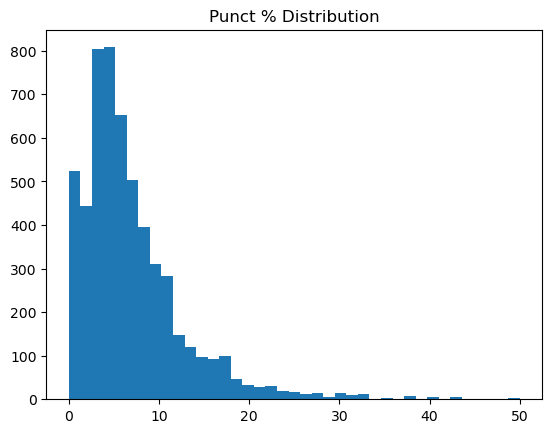

In [11]:
# Repeat. Create a array of evenly spaced values according to the 'start' 'stop' and 'num parameters set using numpy arrays. The array will have the length of 'num'. Powerful tool for visualisation and computing
bins = np.linspace(0, 50, 40)

# Again. Plot histogram, check for long tail, the normed option takes care of the outliers, dragging them towards the central data. alpha sets the darkeness of the bars.
pyplot.hist(data['punct%'], bins)
pyplot.title("Punct % Distribution")
pyplot.show()

# Vectorisation

I decided to split the files being that some steps that where covered to understand the under workings were more pythonically done in here, i.e. the use of lambda to apply tokenisation was done by a function the sklearn library
Taking the tokenised stemmed or lemmatised text row by row or say line by line and counting eah word occurence as they appear all through the document, counting each word per cell.
This words form columns and are uniquely occuring through the dataset

In [1]:
import pandas as pd
import nltk
import string
import re
import csv
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
# read dataset in
df = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None)

# set headers
df.columns = ['label', 'body_text']
df.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


### Load punctuations, stopwords and parser the stemming function into an object

In [3]:
pd.set_option('display.max_colwidth', 100)
punct = string.punctuation
stop_words = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
# wn = nltk.WordNetLemmatizer()
print(punct, "\n", stop_words)


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'on

### Create function to remove punctuations, tokenise text, remove stopwords and preform stemming

In [4]:
def cleaning(text):
    text = "".join([word.lower() for word in text if word not in punct])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stop_words]
    return text

### Apply count vectorise and fit and transform it on the body text

In [5]:
# store the vectoriser in an object ( this is called instantiation of object)
count_vect = CountVectorizer(analyzer=cleaning)

# fit transform data to document term matrix
X_counts = count_vect.fit_transform(df['body_text'])

print(type(X_counts))
print(X_counts.shape)
print(count_vect.get_feature_names_out())

<class 'scipy.sparse._csr.csr_matrix'>
(5568, 8107)
['' '0' '008704050406' ... 'ü' 'üll' '〨ud']


In [6]:
# get smaller data
df_sample = df[0:20] 
df_sample.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [7]:
# instantiate vectoriser into an object
count_vect_sample = CountVectorizer(analyzer=cleaning)

# fit and transform by applying vectoriser to the stemmed text to make document term matrix
X_counts_sample = count_vect_sample.fit_transform(df_sample['body_text'])

print(X_counts_sample.shape)
print(count_vect_sample.get_feature_names_out())


(20, 201)
['08002986030' '08452810075over18' '09061701461' '1' '100' '100000' '11'
 '12' '150pday' '16' '2' '20000' '2005' '21st' '3' '4' '4403ldnw1a7rw18'
 '4txtú120' '6day' '81010' '87077' '87121' '87575' '9' '900' 'aft' 'aid'
 'alreadi' 'anymor' 'appli' 'ard' 'around' 'b' 'bless' 'breather'
 'brother' 'call' 'caller' 'callertun' 'camera' 'cash' 'chanc' 'claim'
 'click' 'co' 'code' 'colour' 'comin' 'comp' 'copi' 'cost' 'credit' 'cri'
 'csh11' 'cup' 'custom' 'da' 'date' 'dont' 'eg' 'eh' 'england' 'enough'
 'entitl' 'entri' 'even' 'fa' 'feel' 'final' 'fine' 'finish' 'first'
 'free' 'friend' 'fulfil' 'go' 'goalsteam' 'goe' 'gonna' 'gota' 'grant'
 'ha' 'help' 'hl' 'home' 'hour' 'httpwap' 'im' 'info' 'ive' 'jackpot'
 'joke' 'k' 'kim' 'kl341' 'lar' 'latest' 'lccltd' 'like' 'link' 'live'
 'lor' 'lunch' 'macedonia' 'make' 'may' 'mell' 'membership' 'messag'
 'minnaminungint' 'miss' 'mobil' 'month' 'nah' 'name' 'nation' 'naughti'
 'network' 'news' 'next' 'nurungu' 'oh' 'oru' 'patent' 'pay' 'pe

#### When you have a matrix or data with most output of Zeros it is reffered to as sparse matrrices. It will be inefficient to store all the 0 values, instead we store the location and values of non-zero elements

In [8]:
# to view array we have to expand the matrix into a dataframe
X_count_df = pd.DataFrame(X_counts_sample.toarray())

X_count_df

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X_count_df.columns = count_vect_sample.get_feature_names_out()
X_count_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,winner,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


## N-GRAMs

#### Definition
create document term matrix still with the count, but this time instead of returning single words in columns, they represent combinations of adjacent words defined by length n in the body-text

In [10]:
df.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [11]:

# create funtion to remove punctuation, change to lowercase, tokens words by spliting them with re, remove stop words and preform steming or lematisation
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in punct])
    tokens = re.split('\W+', text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stop_words])
    return text


df['cleaned_text']= df['body_text'].apply(lambda x: clean_text(x))
df.head()

,label,body_text,cleaned_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,ive search right word thank breather promis wont take help grant fulfil promis wonder bless time
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday


In [12]:
# instantiate the vectoriser into an object
ngram_vect = CountVectorizer(ngram_range=(2,2))

# fit and transform the text to document term matrix
X_counts_ng = ngram_vect.fit_transform(df['cleaned_text'])

print(X_counts_ng.shape)
print(ngram_vect.get_feature_names_out())

(5568, 31275)
['008704050406 sp' '0089mi last' '0121 2025050' ... 'üll submit'
 'üll take' '〨ud even']


In [13]:
df_ng_sample = df[0:20]
df_ng_sample.head()

,label,body_text,cleaned_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,ive search right word thank breather promis wont take help grant fulfil promis wonder bless time
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday


In [14]:
# Using a smaller sample size of data for visibility. Instantiate the vectoriser again into an object.
ngram_vect_sample = CountVectorizer(ngram_range=(2,2))
X_counts_ng_sample = ngram_vect_sample.fit_transform(df_ng_sample['cleaned_text'])      # this is an array

print(X_counts_ng_sample.shape)
print(ngram_vect_sample.get_feature_names_out())

(20, 209)
['09061701461 claim' '100 20000' '100000 prize' '11 month' '12 hour'
 '150pday 6day' '16 tsandc' '20000 pound' '2005 text' '21st may'
 '4txtú120 poboxox36504w45wq' '6day 16' '81010 tc' '87077 eg'
 '87077 trywal' '87121 receiv' '87575 cost' '900 prize' 'aft finish'
 'aid patent' 'anymor tonight' 'appli 08452810075over18' 'appli repli'
 'ard smth' 'around though' 'bless time' 'breather promis' 'brother like'
 'call 09061701461' 'call mobil' 'caller press' 'callertun caller'
 'camera free' 'cash 100' 'chanc win' 'claim 81010' 'claim call'
 'claim code' 'click httpwap' 'click wap' 'co free' 'code kl341'
 'colour mobil' 'comp win' 'copi friend' 'cost 150pday' 'credit click'
 'cri enough' 'csh11 send' 'cup final' 'custom select' 'da stock'
 'date sunday' 'dont miss' 'dont think' 'dont want' 'eg england'
 'eh rememb' 'england 87077' 'england macedonia' 'enough today'
 'entitl updat' 'entri questionstd' 'entri wkli' 'even brother' 'fa 87121'
 'fa cup' 'feel way' 'final tkt' 'fine way

In [15]:
# Convert the array created byt the vectoriser to a data frame with pandas
X_counts_df_sample = pd.DataFrame(X_counts_ng_sample.toarray())

# Get the features from the dataframe
X_counts_df_sample.columns = ngram_vect_sample.get_feature_names_out()

X_counts_df_sample.head()

,09061701461 claim,100 20000,100000 prize,11 month,12 hour,150pday 6day,16 tsandc,20000 pound,2005 text,21st may,...,win fa,winner valu,wkli comp,wonder bless,wont take,word claim,word thank,wwwdbuknet lccltd,xxxmobilemovieclub use,ye naughti
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,1,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF vectoriser 

#### Term frequemcy - inverse document frequency weighting
This vectoriser still returns a document term matrix but each cell doesn't hold count for the unique words, but weights. is allocates how important a word is in a text.

In [16]:
# Read in the raw data once more and clean it for this task
data = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None)
data.columns = ['label', 'body_text']
data.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [17]:
# clean up using already defined punct and stopwords and stem
def prep_text(text):
    text = "".join([word.lower() for word in text if word not in punct])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stop_words]
    return text

## Now we instantiate the TF-IDF vectorise into an object

In [18]:
# Instantiate, fit and trasform data wih vetorise
tfidf_vect = TfidfVectorizer(analyzer=prep_text)
X_tfidf_df = tfidf_vect.fit_transform(data['body_text'])

print(X_tfidf_df.shape)
print(tfidf_vect.get_feature_names_out())

(5568, 8107)
['' '0' '008704050406' ... 'ü' 'üll' '〨ud']


In [19]:
# get smaller sample size to view things clearer
data_tfidf = data[0:20]
data_tfidf.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [20]:
tfidf_vect_sample = TfidfVectorizer(analyzer=prep_text)
X_tfidf_df_sample = tfidf_vect_sample.fit_transform(data_tfidf['body_text'])

print(X_tfidf_df_sample.shape)
print(tfidf_vect_sample.get_feature_names_out())

(20, 201)
['08002986030' '08452810075over18' '09061701461' '1' '100' '100000' '11'
 '12' '150pday' '16' '2' '20000' '2005' '21st' '3' '4' '4403ldnw1a7rw18'
 '4txtú120' '6day' '81010' '87077' '87121' '87575' '9' '900' 'aft' 'aid'
 'alreadi' 'anymor' 'appli' 'ard' 'around' 'b' 'bless' 'breather'
 'brother' 'call' 'caller' 'callertun' 'camera' 'cash' 'chanc' 'claim'
 'click' 'co' 'code' 'colour' 'comin' 'comp' 'copi' 'cost' 'credit' 'cri'
 'csh11' 'cup' 'custom' 'da' 'date' 'dont' 'eg' 'eh' 'england' 'enough'
 'entitl' 'entri' 'even' 'fa' 'feel' 'final' 'fine' 'finish' 'first'
 'free' 'friend' 'fulfil' 'go' 'goalsteam' 'goe' 'gonna' 'gota' 'grant'
 'ha' 'help' 'hl' 'home' 'hour' 'httpwap' 'im' 'info' 'ive' 'jackpot'
 'joke' 'k' 'kim' 'kl341' 'lar' 'latest' 'lccltd' 'like' 'link' 'live'
 'lor' 'lunch' 'macedonia' 'make' 'may' 'mell' 'membership' 'messag'
 'minnaminungint' 'miss' 'mobil' 'month' 'nah' 'name' 'nation' 'naughti'
 'network' 'news' 'next' 'nurungu' 'oh' 'oru' 'patent' 'pay' 'pe

In [22]:
# Create dataframe from the sparse matrix
X_tfidf_df = pd.DataFrame(X_tfidf_df_sample.toarray())
X_tfidf_df.columns = tfidf_vect_sample.get_feature_names_out()
X_tfidf_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,winner,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.238737,0.238737,0.209853,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.231645,0.000000,0.000000,0.000000,0.000000,0.231645,0.000000,0.000000,...,0.231645,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.197682,0.000000,0.000000,0.000000,0.000000,0.000000,0.197682,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.224905,0.000000,0.000000,0.000000,0.224905,0.197695,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
# Import libraries to be used
import pandas as pd
import numpy as np
import re
import string
from matplotlib import pyplot
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score 
from sklearn.model_selection import train_test_split

In [16]:
# Initialise the stopwords from nltk.corpus
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [17]:
# Load data set and set preliminaries
df = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None)
df.columns = ['label', 'text']

df.head()

,label,text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [18]:
# Function to get the percentage of punctuations in text, sum them, round up and multiply by 100
def count_punct(text):
    punct_count = sum([1 for char in text if char in string.punctuation])
    return round(punct_count/(len(text) - text.count(" ")), 3) * 100


# Create a feature that would check the len of text and the percentage of punctuations
df['len_text'] = df['text'].apply(lambda x: len(x) - x.count(" "))
df['punct%'] = df['text'].apply(lambda x: count_punct(x))


# Function to remove punctuations, tokenise and stem words
def clean_text(text):
    text = " ".join([word.lower() for word in text if word not in string.punctuation])
    token = re.split('\W+', text)
    text = [ps.stem(word) for word in token if word not in stopwords]
    return text

In [19]:
df.head()

,label,text,len_text,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


In [20]:
# Instantiate the vectorise and use the function to stem as hyperparameter, thus gives an vectorised object. Fit and transforrm the text
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(df['text'])

print(tfidf_vect.get_feature_names_out())

# Convert the features from the vectorisation to an array and concatenate the two new features added
X_features = pd.concat([df['len_text'], df['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()




['' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'b' 'c' 'e' 'f' 'g' 'h' 'j'
 'k' 'l' 'n' 'p' 'q' 'r' 'u' 'v' 'w' 'x' 'z' 'è' 'é' 'ì' 'ú' 'ü' '〨' '鈥']


,len_text,punct%,0,1,2,3,4,5,6,7,...,26,27,28,29,30,31,32,33,34,35
0,160,2.5,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,...,0.157083,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,128,4.7,0.0,0.407846,0.404499,0.377804,0.0,0.08308,0.257814,0.0,...,0.071954,0.14608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,4.1,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,...,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62,3.2,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,...,0.092022,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,7.1,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,...,0.472263,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Instantiate the classifier, perform the kfold spliting of data, and carry out cross evaluation
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
X_features.columns = X_features.columns.astype(str)
cross_val_score(rf, X_features, df['label'], cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.97666068, 0.98025135, 0.97845601, 0.97394429, 0.97933513])

## Explore RandomForestClassifier through Holdout Set

In [22]:
# Split dataset into training and testing sets and set
X_train, X_test, y_train, y_test = train_test_split(X_features, df['label'], test_size=0.2)
X_train.columns = X_train.columns.astype(str)

# Fit the model, initialise the classifier and set hypeparameter
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)



In [23]:
# Getting the most important feature
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.1749140756670773, '1'),
 (0.1489287149390899, '2'),
 (0.11018183872943553, '9'),
 (0.08564620515772503, '6'),
 (0.08179434234239791, '7'),
 (0.06752728360735318, '8'),
 (0.04311942903005069, 'len_text'),
 (0.027670144913576826, '3'),
 (0.02568544031154941, '4'),
 (0.022252568819389723, '5')]

In [24]:
# Carry out prediction with the X_test data, the y_test is not needed, score the predictions and save them respectively, calculate accuracy
y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')

# Precision when a model identify something as spam it was spam the 'x' number of time
print("Precision: {} / Recall: {} / Accuracy: {}".format(round(precision, 3), 
                                                         round(recall, 3),
                                                         round((y_pred==y_test).sum() / len(y_pred), 3)))

Precision: 0.944 / Recall: 0.873 / Accuracy: 0.978


## GRID SEARCH
So here we need to test different hyperparamter setting to know which gives better model performance, so we would wirte the inner and out loop for the grid settings
then call a function that takes the grid settings, test and predicts the various model performance.

In [25]:
# Function to instantiate the classifier, train and predict
def train_pred_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est: {} / Depth: {} / ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, round(precision, 3), round(recall, 3), round((y_pred==y_test).sum() / len(y_pred), 3)
    ))

    

In [26]:
# Perform Grid search by costructing this inner and outter loop
for n_est in [10, 50, 100]:
    for depth in [None, 10, 20, 30]:
        train_pred_RF(n_est, depth)

Est: 10 / Depth: None / ---- Precision: 0.942 / Recall: 0.843 / Accuracy: 0.975
Est: 10 / Depth: 10 / ---- Precision: 0.943 / Recall: 0.858 / Accuracy: 0.977
Est: 10 / Depth: 20 / ---- Precision: 0.967 / Recall: 0.873 / Accuracy: 0.981
Est: 10 / Depth: 30 / ---- Precision: 0.966 / Recall: 0.858 / Accuracy: 0.979
Est: 50 / Depth: None / ---- Precision: 0.967 / Recall: 0.873 / Accuracy: 0.981
Est: 50 / Depth: 10 / ---- Precision: 0.967 / Recall: 0.881 / Accuracy: 0.982
Est: 50 / Depth: 20 / ---- Precision: 0.959 / Recall: 0.873 / Accuracy: 0.98
Est: 50 / Depth: 30 / ---- Precision: 0.944 / Recall: 0.873 / Accuracy: 0.978
Est: 100 / Depth: None / ---- Precision: 0.952 / Recall: 0.881 / Accuracy: 0.98
Est: 100 / Depth: 10 / ---- Precision: 0.967 / Recall: 0.881 / Accuracy: 0.982
Est: 100 / Depth: 20 / ---- Precision: 0.975 / Recall: 0.866 / Accuracy: 0.981
Est: 100 / Depth: 30 / ---- Precision: 0.952 / Recall: 0.881 / Accuracy: 0.98


### Box-Cox Power Transformation

**Base Form**: $$ y^x $$

| X    | Base Form           |           Transformation               |
|------|--------------------------|--------------------------|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ log(y) $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |


**Process**
1. Determine what range of exponents to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution

In [16]:
import csv
import pandas as pd
import string
from matplotlib import pyplot
import numpy as np

In [17]:
# read csv file using pandas DataFrame
df = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None)
df.columns = ['label', 'body_text']

df.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [18]:
# Function to count the number of punctuation in the text while iterating through them each row.
def punct_count(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3) * 100


# Create the features, remove the white space " " while getting the legnth and apply the punctuation percentage function to the second
df['body_len'] = df['body_text'].apply(lambda x: len(x) - x.count(" "))
df['punct%'] = df['body_text'].apply(lambda x: punct_count(x))
df.head()

,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


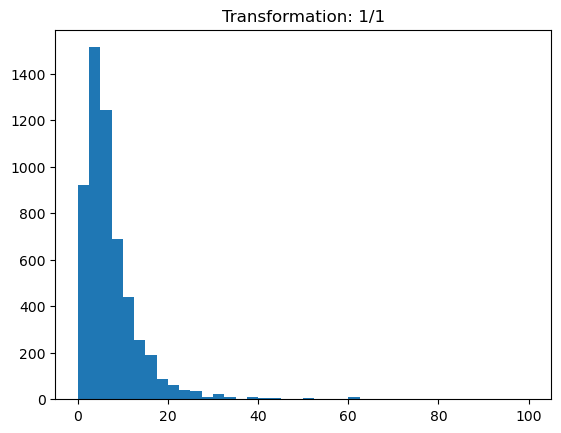

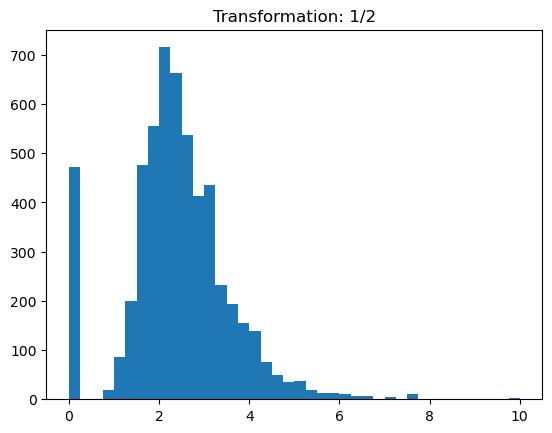

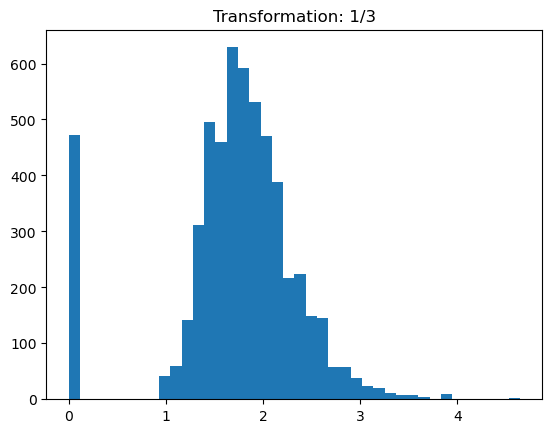

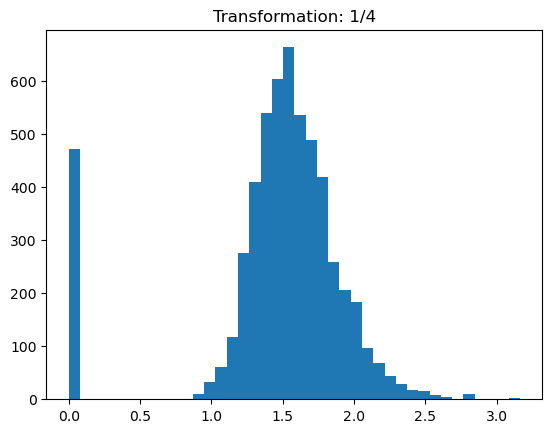

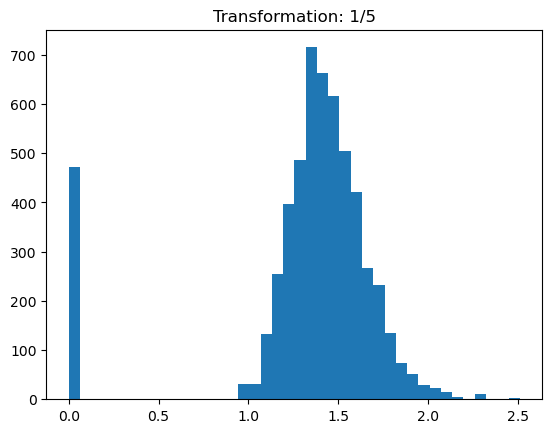

In [23]:
# Here we iterate through the numbers we want to use for the exponential in the box-cox power transformation, also apply the transformation to features
for i in [1, 2, 3, 4, 5]:
    pyplot.hist((df['punct%'])**(1/i), bins=40)
    pyplot.title("Transformation: 1/{}".format(str(i)))
    pyplot.show()